In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Read Data

In [0]:
df = pd.read_csv('/content/drive/My Drive/Data Science/Capstone Project/Loss_Ratio.csv', parse_dates=True)
df.shape

(9134, 26)

#### Explore Data

In [0]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [0]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [0]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### Clean Data

In [0]:
# Replace 0 "Months Since Policy Inception" with 1 since denominator cannot be one
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].replace(0, 1)

In [0]:
# Create Loss_Ratio Column
df['Loss_Ratio'] = df['Claim Amount']/(df['Monthly Premium Auto']*df['Months Since Policy Inception'])
#df['Loss_Ratio'] = (df.'Monthly Premium Auto')/(df.'Monthly Premium Auto'*(df.'Months Since Policy Inception'.replace(0, np.inf))
#df['C'] = (df.A / df.B.mask(df.B == 0, np.inf)) df.B.replace(0, np.inf)
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Loss_Ratio
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0.801020
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,0.176787
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0.314021
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,0.110970
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0.087599


In [0]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Loss_Ratio                       0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f754d6bc898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f754d6d20b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f754d6d2a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f754d6d2748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f754d6bc9e8>,
  <matplotlib.lines.Line2D at 0x7f754d6bcd30>]}

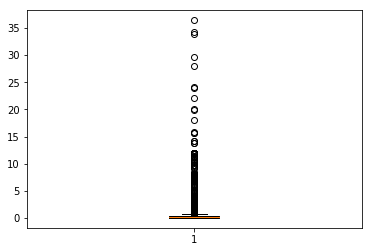

In [0]:
plt.boxplot(df['Loss_Ratio'])

In [0]:
#set up bins
bin = [0,0.5,100]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(df.Loss_Ratio,bin)
category = category.to_frame()
category.columns = ['Range']
#concatenate age and its bin
df_new = pd.concat([df,category],axis = 1)

In [0]:
category.Range.value_counts()

(0.0, 0.5]      7495
(0.5, 100.0]    1639
Name: Range, dtype: int64

In [0]:
print('Passive Policy Count: ', 7495/(7495+841+798))
print('Attritional Policy Count: ', (841+798)/(7495+841+798))

Passive Policy Count:  0.8205605430260565
Attritional Policy Count:  0.1794394569739435


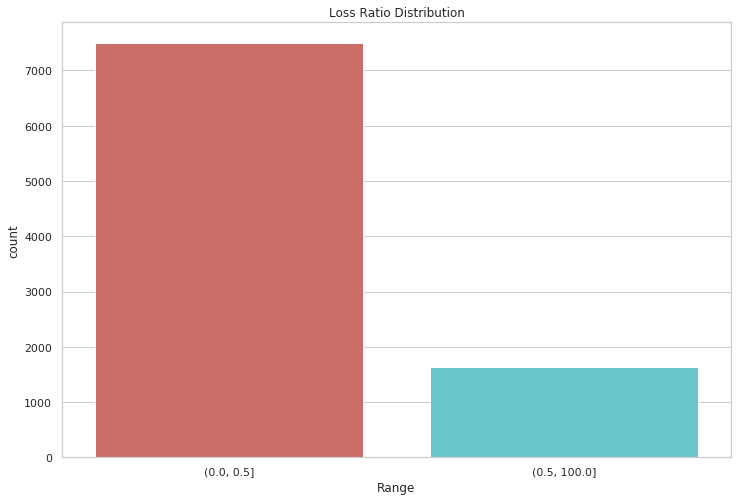

In [0]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
#draw histogram plot
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'Range', ax=ax, data = df_new, palette = 'hls').set_title('Loss Ratio Distribution')
plt.show()

In [0]:
buckets = [0, 0.5, 100]
buckets_name = [0, 1]

df['Loss_Ratio_Classified'] = pd.cut(df.Loss_Ratio, buckets, labels = buckets_name)
df.Loss_Ratio_Classified.unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [0]:
df['Loss_Ratio_Classified'] = df['Loss_Ratio_Classified'].astype(int)

In [0]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Loss_Ratio,Loss_Ratio_Classified
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0.801020,1
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,0.176787,0
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0.314021,0
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,0.110970,0
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0.087599,0


#### Encode Columns

In [0]:
df['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [0]:
Coverage = {
                'Basic': 1, 
                'Extended': 2, 
                'Premium': 3
           }

In [0]:
df['Coverage'] = df['Coverage'].replace(Coverage)

In [0]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [0]:
Education = {
                'High School or Below': 1, 
                'College': 2, 
                'Bachelor': 3,
                'Master': 4,
                'Doctor': 5
            }

In [0]:
df['Education'] = df['Education'].replace(Education)

In [0]:
df['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [0]:
EmploymentStatus = {
                        'Employed': 1, 
                        'Unemployed': 0, 
                        'Medical Leave': 0,
                        'Disabled': 0,
                        'Retired': 0
                    }

In [0]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace(EmploymentStatus)

In [0]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [0]:
Marital_Status = {
                        'Married': 1, 
                        'Single': 0, 
                        'Divorced': 0
                    }

In [0]:
df['Marital Status'] = df['Marital Status'].replace(Marital_Status)

In [0]:
df['Claim Reason'].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [0]:
Claim_Reason = {
                        'Hail': 1, 
                        'Scratch/Dent': 2, 
                        'Collision': 3,
                        'Other': 4
                }

In [0]:
df['Claim Reason'] = df['Claim Reason'].replace(Claim_Reason)

In [0]:
df['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [0]:
Vehicle_Class = {
                        'Two-Door Car': 1, 
                        'Four-Door Car': 2, 
                        'SUV': 3,
                        'Luxury SUV': 4,
                        'Sports Car': 5,
                        'Luxury Car': 6
                }

In [0]:
df['Vehicle Class'] = df['Vehicle Class'].replace(Vehicle_Class)

In [0]:
df['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [0]:
Vehicle_Size = {
                        'Small': 1, 
                        'Medsize': 2, 
                        'Large': 3
                }

In [0]:
df['Vehicle Size'] = df['Vehicle Size'].replace(Vehicle_Size)

In [0]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                           int64
Education                          int64
Effective To Date                 object
EmploymentStatus                   int64
Gender                            object
Income                             int64
Location Code                     object
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                       int64
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        #df[col_name]= df[col_name].astype('category')
        #df[col_name] = df[col_name].cat.codes
        df[col_name] = labelencoder.fit_transform(df[col_name])
df.dtypes

Customer                           int64
Country                            int64
State Code                         int64
State                              int64
Claim Amount                     float64
Response                           int64
Coverage                           int64
Education                          int64
Effective To Date                  int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Claim Reason                       int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class   

In [0]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Loss_Ratio,Loss_Ratio_Classified
0,600,0,1,1,276.351928,0,1,3,47,1,0,56274,1,1,69,32,5,0,1,0,2,3,0,384.811147,1,2,0.801020,1
1,5946,0,3,3,697.953590,0,2,3,24,0,0,0,1,0,94,13,42,0,8,1,5,2,0,1131.464935,2,2,0.176787,0
2,96,0,4,4,1288.743165,0,3,3,41,1,0,48767,1,1,108,18,38,0,2,1,5,3,0,566.472247,1,2,0.314021,0
3,8016,0,2,2,764.586183,0,1,3,12,0,1,0,1,1,106,18,65,0,7,0,1,3,2,529.881344,3,2,0.110970,0
4,2488,0,1,1,281.369258,0,1,3,52,1,1,43836,0,0,73,12,44,0,1,1,3,3,0,138.130879,2,2,0.087599,0


#### Top 10 Features that have high correlation with the Target variable 

In [0]:
def get_top_feature(df, target_column, n):
    return df.corr().unstack().sort_values(ascending=False)[target_column][0:n]
get_top_feature(df, 'Loss_Ratio_Classified', 10)

Loss_Ratio_Classified      1.000000
Loss_Ratio                 0.494390
Claim Amount               0.285733
Policy                     0.024594
Income                     0.022889
EmploymentStatus           0.020940
Months Since Last Claim    0.019998
Policy Type                0.017569
Number of Policies         0.016647
Vehicle Size               0.013691
dtype: float64

In [0]:
df_items.groupby("Loss_Ratio_Classified").mean()

,Income
Loss_Ratio_Classified,
0,37332.229219
1,39144.265406


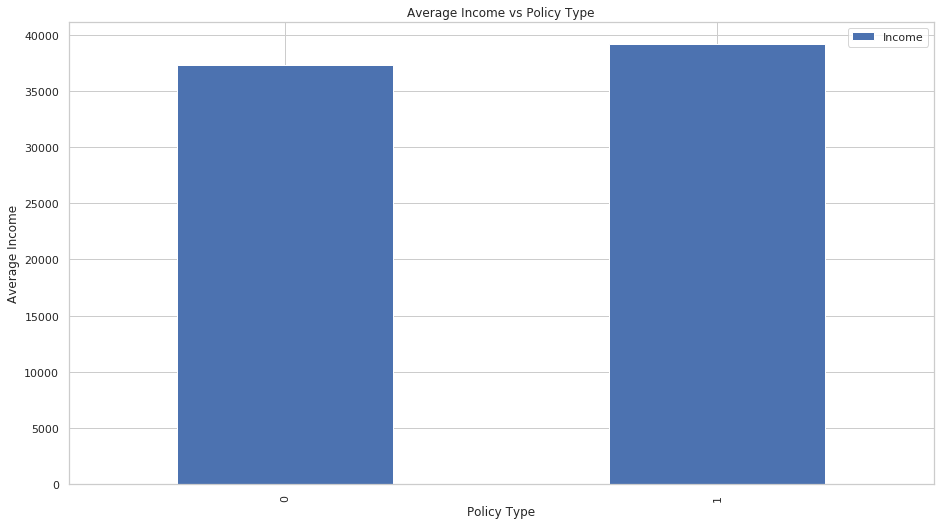

In [0]:
#plt.bar(df['Loss_Ratio_Classified'],df['Income'])

df_items = df[["Income", "Loss_Ratio_Classified"]]
df_items.groupby("Loss_Ratio_Classified").mean().plot(kind="bar")
#df_items[0].set_color('r')
plt.title('Average Income vs Policy Type') 
plt.xlabel('Policy Type')
plt.ylabel('Average Income')
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5, forward=True)
fig.savefig('test2png.png', dpi=100)
plt.show()

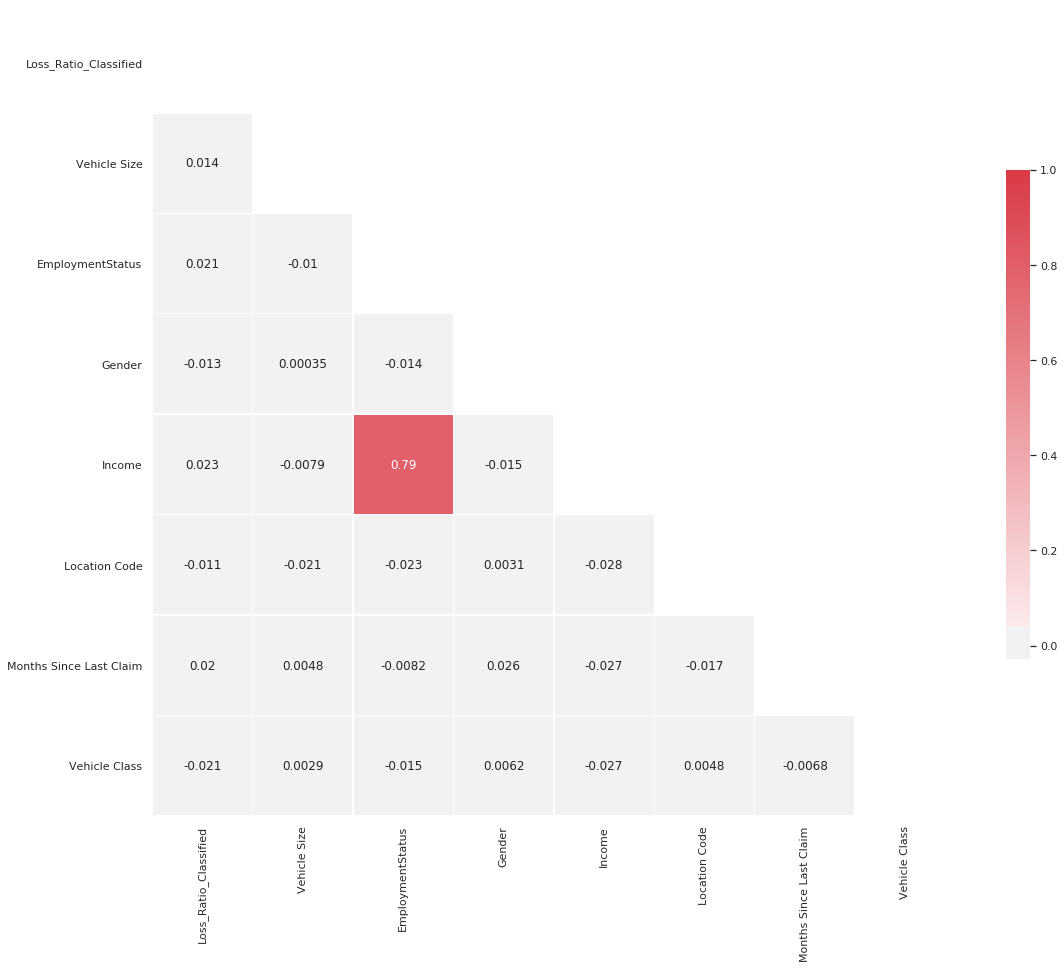

In [0]:
import seaborn as sns


sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.loc[:,['Loss_Ratio_Classified','Vehicle Size','EmploymentStatus','Gender','Income','Location Code','Months Since Last Claim','Vehicle Class']].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.loc[:,['Loss_Ratio_Classified','Vehicle Size','EmploymentStatus','Gender','Income','Location Code','Months Since Last Claim','Vehicle Class']].corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

'Income' and 'EmploymentStatus' are highly correlated so Employment Status will not be used for modelling since Income seems to have higher correlation with the target variable.

In [0]:
np.average(df[df['Loss_Ratio_Classified']==1]['Monthly Premium Auto'].values)

91.28187919463087

In [0]:
np.average(df[df['Loss_Ratio_Classified']==0]['Monthly Premium Auto'].values)

93.64296197464977

In [0]:
df['Loss_Ratio_Classified'].value_counts()

0    7495
1    1639
Name: Loss_Ratio_Classified, dtype: int64

#### Save transformed data to csv file

In [0]:
df.to_csv(r'Loss_Ratio_Modelling.csv')